![](https://www.demilked.com/magazine/wp-content/uploads/2019/11/5dc52282820c9-creative-extreme-teachers-prevent-cheating-14-5dc285df5eaa4__700.jpg)
# Introduction
This dataset was obtained from a learning management system (LMS) called Kalboard 360. This LMS allows users to have access to educational resources as long as they have an internet connection. This system also tracks learners progress such as how many times they read or watch an educational material. **Using these data, we will want to find out the factors that are linked to the success of the students. **

## Looking into the columns 
- Gender - student's gender (nominal: 'Male' or 'Female’)

- Nationality- student's nationality 

- Place of birth- student's Place of birth 

- Educational Stages- educational level student belong

- Grade Levels- grade student belongs

- Section ID- classroom student belongs

- Topic- course topic

- Semester- school year semester 

- Parent responsible for student

- Raised hand- how many times the student raises his/her hand on classroom 

- Visited resources- how many times the student visits a course content

- Viewing announcements-how many times the student checks the new announcements

- Discussion groups- how many times the student participate on discussion groups

- Parent Answering Survey- parent answered the surveys which are provided from school or not

- Parent School Satisfaction- the Degree of parent satisfaction from school

- Student Absence Days-the number of absence days for each student

- Class:
 * Low-Level: interval includes values from 0 to 69,
 * Middle-Level: interval includes values from 70 to 89,
 * High-Level: interval includes values from 90-100.

## Objective
- Identify key factors that has an impact on the success of the student

In [8]:
# Importing required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # Making sns as default for plots 

# Importing dataset into colab
# As we are working with colab, we will need to use the following code to import the dataset into this notebook
from google.colab import files 
uploaded = files.upload()

Saving xAPI-Edu-Data.csv to xAPI-Edu-Data (1).csv


In [9]:
# Importing dataset into notebook
data = pd.read_csv('xAPI-Edu-Data.csv')

# Viewing dataset
print(data.head())

# Viewing shape
print(data.shape)

  gender NationalITy  ... StudentAbsenceDays Class
0      M          KW  ...            Under-7     M
1      M          KW  ...            Under-7     M
2      M          KW  ...            Above-7     L
3      M          KW  ...            Above-7     L
4      M          KW  ...            Above-7     M

[5 rows x 17 columns]
(480, 17)


#### We are able to see that we have 480 rows and 17 columns. Not a big dataset!
#### Let's identify any NULL/NaN values

In [11]:
data.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

#### Sweet! Nothing to remove!

#### Now lets have a summary of the data using .describe(include = 'all')

In [12]:
data.describe(include = 'all')

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480.000000,480.000000,480.000000,480.000000,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,NaN,NaN,NaN,NaN,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,NaN,NaN,NaN,NaN,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,NaN,NaN,NaN,NaN,270,292,289,211
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.775000,54.797917,37.918750,43.283333,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.779223,33.080007,26.611244,27.637735,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.750000,20.000000,14.000000,20.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,65.000000,33.000000,39.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.000000,84.000000,58.000000,70.000000,NaN,NaN,NaN,NaN


## Let's visualise distribution and correlation of numeric variables using pairplot

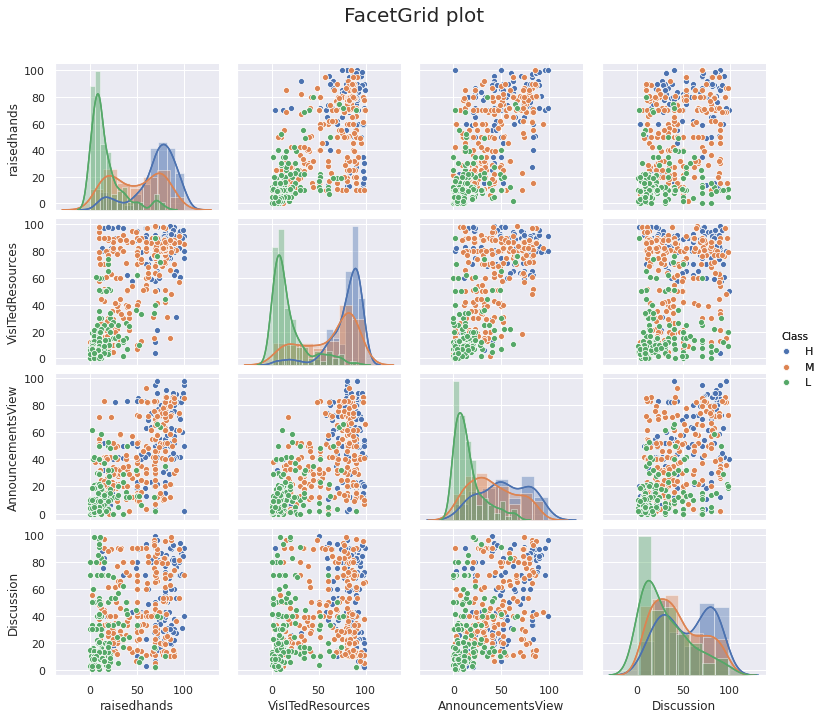

In [13]:
g = sns.pairplot(data,hue = 'Class', hue_order= ['H', 'M', 'L'])
g.map_diag(sns.distplot)
g.add_legend()
g.fig.suptitle('FacetGrid plot', fontsize = 20)
g.fig.subplots_adjust(top= 0.9);

## What do we see here?
- People in the L class have very low participation rates as we see the distribution to be right skewed.
- People in the H class have high participation rates and utilises the resources on the platform
- People in the M class are widely distrubuted. As M class represents majority of the dataset, that could be the reason why it's evenly distributed.

# Looking into gender among different classes

Text(0.5, 1.0, 'Graph showing number of males and females among different classes')

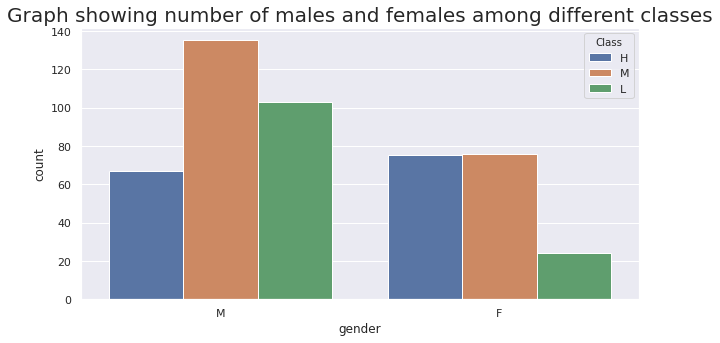

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data = data, x = 'gender', hue = 'Class', hue_order= ['H', 'M', 'L']).set_title("Graph showing number of males and females among different classes", fontsize = 20)

## What do we see here?
- It seems that we observed a lower number of males in H class, as majority are found in M and followed by L. We observed an equal number of females in both H and M classes, with a little over 20 in L.
- We also need to understand that 305 out of 480 people are males. Could it be that the females are deprived of education and that motivates them to work harder? or is it simply the fact that less females are aware of this platform? 

# Looking into nationality among classes

Text(0.5, 1.0, 'Graph showing number of countries among different classes')

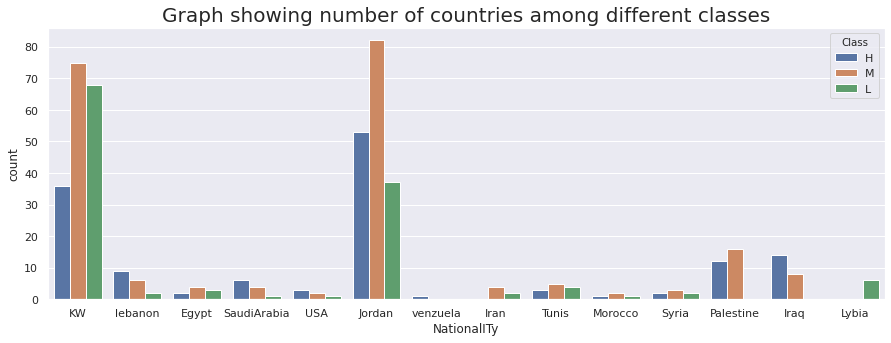

In [15]:
plt.figure(figsize=(15,5))

sns.countplot(data = data, x ='NationalITy', hue = 'Class', hue_order= ['H', 'M', 'L']).set_title("Graph showing number of countries among different classes", fontsize = 20)

## What do we see here?
- It seems that majority of the dataset is obtained from Kuwait and Jordan, with Kuwait having the most number in L class.
- This does not mean that the rest of the other countries do not have access to a proper education system, it just meant that there are more student from Kuwait and Jordan utilising the platform.

# Looking into different stage of education among classes

Text(0.5, 1.0, 'Graph showing number of stages among different classes')

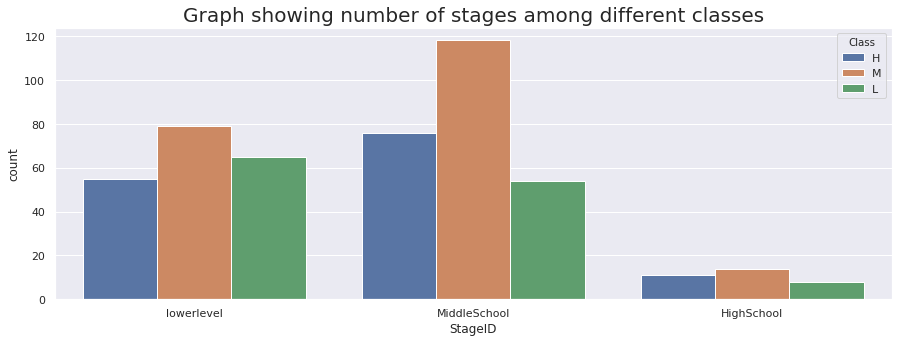

In [16]:
plt.figure(figsize=(15,5))

sns.countplot(data = data, x ='StageID', hue = 'Class', hue_order= ['H', 'M', 'L']).set_title("Graph showing number of stages among different classes", fontsize = 20)

## What do we see here?
- A huge proportion of students were at lower school or middle school. We do see an improvement in the student's results (L classes decreases from lower level to middle school, M and H classes increase significantly). There could be various reason why this happen:
 * Better resources were catered to middle school students
 * As people are more familiar with the resources on the LMS, they know where and how to improve the efficiency of their study sessions 
 * Less resources are catered to teaching high school students

# Overview of topics among different classes

Text(0.5, 1.0, 'Graph showing number of topics among different classes')

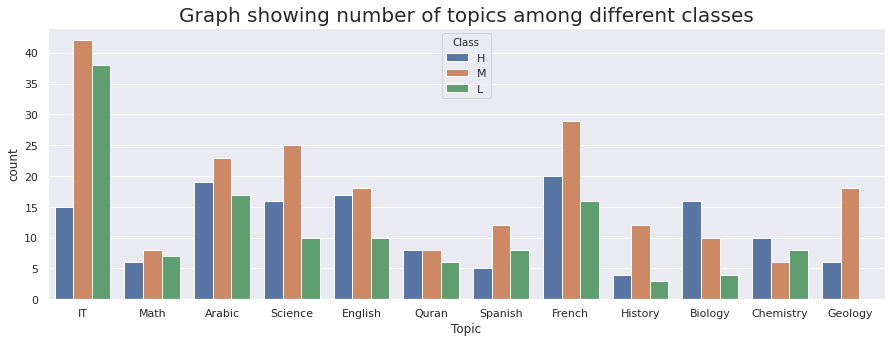

In [17]:
plt.figure(figsize=(15,5))

sns.countplot(data = data, x ='Topic', hue = 'Class', hue_order= ['H', 'M', 'L']).set_title("Graph showing number of topics among different classes", fontsize = 20)

## What do we see here?
- It seems that majority of the results come from IT. Interestingly, we do not see L classes students in geology. Let's find out why.

In [18]:
lst = ['Topic','Class', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
data1 = data[lst]
data1.groupby('Topic').median()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
Topic,,,,
Arabic,32.0,65.0,41.0,38.0
Biology,78.5,88.5,54.0,47.0
Chemistry,79.0,84.5,47.0,30.5
English,55.0,50.0,33.0,36.0
French,35.0,80.0,23.0,21.0
Geology,80.0,82.0,68.5,60.5
History,69.0,84.0,72.0,65.0
IT,20.0,25.0,10.0,40.0
Math,28.0,15.0,19.0,40.0


#### If we look into the median, we see high participation rate in Geology (High number of raised hands, high number of people visiting resources, high views on announcement and high participation in discussion). This explains why no student fall into the L class.

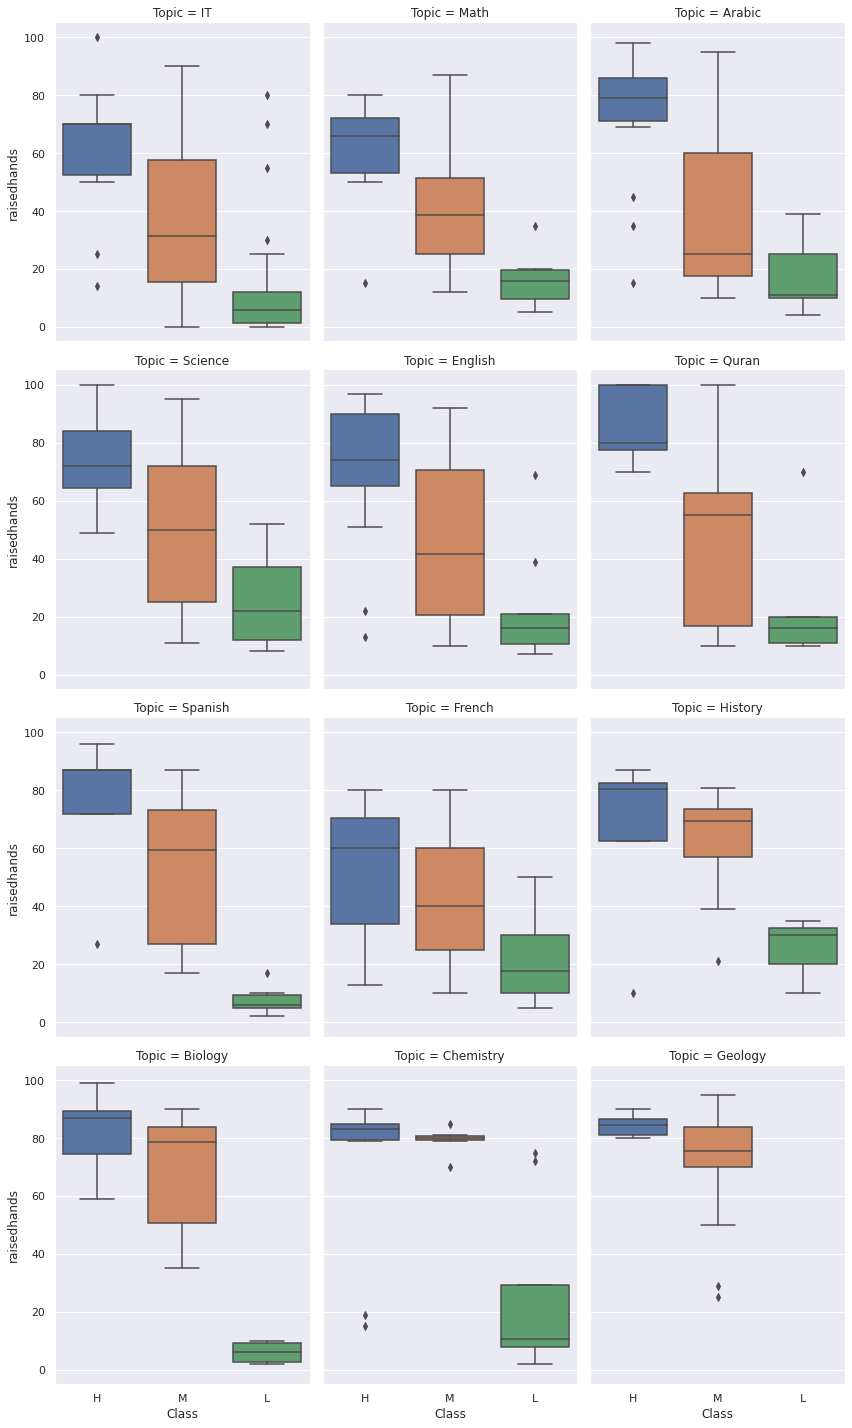

In [19]:
g = sns.catplot(x="Class", y="raisedhands",col_wrap=3, col="Topic", order = ['H', 'M', 'L'],
                data= data, kind="box",
                height=5, aspect=0.8);

## What do we see here?
- Using the examples on raised hands, we see that students with H class tend to be actively asking questions among all topics.

# Overview of whether student absence will affect performance

Text(0.5, 1.0, 'Graph showing student absence days among different classes')

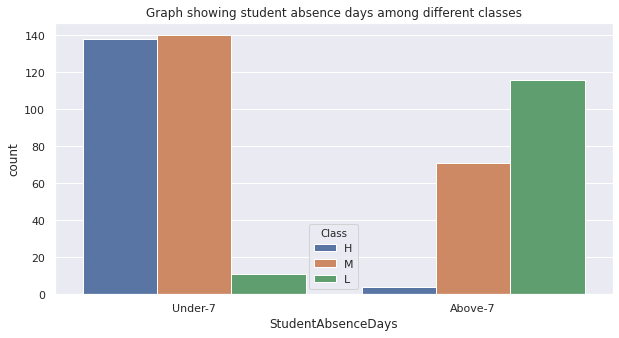

In [20]:
plt.figure(figsize=(10,5))


sns.countplot(data = data, x = 'StudentAbsenceDays', hue = 'Class', hue_order = ['H', 'M', 'L']).set_title("Graph showing student absence days among different classes")

## What do we see here
- It seems that those that are absence below 7 times were performing way better than those exceeding 7. Majority of class L students have high absence days. 

# Which parent in charge will produce better student?

Text(0.5, 1.0, 'Graph showing which parent produce better students')

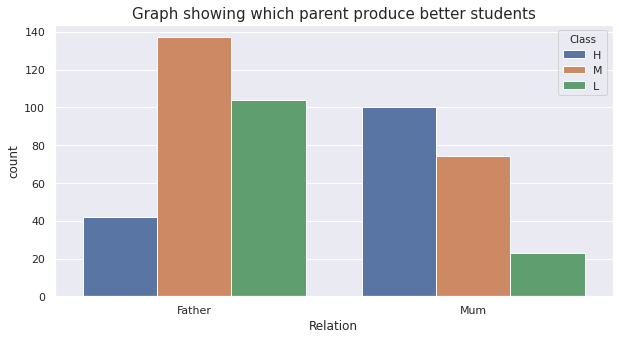

In [21]:
plt.figure(figsize=(10,5))

sns.countplot(data = data, x = 'Relation', hue = 'Class', hue_order = ['H', 'M', 'L']).set_title("Graph showing which parent produce better students", fontsize = 15)

## What do we see here?
- It seems that mothers produce better students than fathers. 
- What I can say is that most of the fathers are busy working to provide for the family. This means they are mostly away from their children. If the child has a mother to guide him or her, he or she will tend to do well due to the support. 

# Summary
- It seems that students who did well on the LMS are those that participated actively on the system (high raised hands, high participation in discussion, high views on announcement and resources).
- It also seems that Mums are the ones that produce better students. I believe that is the case since most men are away from their families due to work.
- Low absence day from class produces better students. Similar to how professors encourage their students to attend lectures.